# Визуализация, понижение размерности
blah-blah-blah
### Пример 1
<img src='images/dimensionality_reduction.png'>
У выборки (яркие точки) три размерности (три признака). 

Если убрать один признак (ось Z), то получится двумерная выборка (бледные точки), но классы всё еще хорошо будут разделяться между собой.

### Пример 2
<img src='images/PCA.png'>
Оба признака значимы, но все данные можно спроецировать на зелёную прямую, практически не потеряв никакой информации.
Признаки линейно зависимые (есть избыточность в данных).

В данном случае нельзя просто выбросить один из признаков (ось x или y), нужно сформировать новый признак на основе двух исходных.

### Пример 3
<img src='images/PCA2.png'>
Можно спроецировать выборку на кривую сложной формы и сделать данные одномерными.

**Задача понижения размерности - это формирование новых признаков на основе исходных.**

**Количество признаков должно уменьшиться, но они должны сохранять в себе как можно больше информации, присутствующей в исходных данных.**

## 1. PCA (Principal Component Analysis), Метод главных компонент

Один из основных способов уменьшить размерность данных, потеряв наименьшее количество информации

#### Задача:
Пусть имеется набор $m$ точек ${x^{(1)} , …, x^{(m)}}$ в пространстве $ℝ^n$ , и мы хотим подвергнуть их сжатию с потерей информации, т. е. сохранить точки в меньшем объеме памяти, возможно, ценой некоторой потери точности. Но хотелось бы свести эти потери к минимуму.

У PCA есть три постановки задачи: 
1. через матричное разложение исходной матрицы объекты-признаки
2. через поиск оптимальной проекционной гиперплоскости (минимизация ошибки проецирования)
3. через поиск проекционной гиперплоскости, при которой получается максимальная дисперсия после проецирования

Все эти постановки задач эквивалентны, приводят к одному и тому же решению.

### Максимизация дисперсии
<img src='images/PCA3.png'>

Есть некоторое облако точек, где каждая точка — это объект выборки, и нужно найти такие оси, при проецировании на которые
мы сохраним как можно больше дисперсии исходной выборки.

Чем больше дисперсии мы сохраним,тем больше информации останется после понижения размерности. 

Хотим выбрать прямую (один признак вместо двух), на которую будет оптимально спроецировать выборку.

Синяя прямая лучше, поскольку при проецировании на неё сохранится больше **информации** о выборке. 

Чем больше **дисперсия** выборки после проецирования на прямую, тем лучше. 

Дисперсия после проецирования на синюю прямую будет выше, чем после проецирования на красную

### Максимизация дисперсии
$$\begin{cases}
\sum \limits_{j=1}^d w_j^T X^T X w_j -> max_w \\ 
W^T W = I
\end{cases}
$$
- Верхняя строка - дисперсия выборки **после проецирования**
- Нижняя строка - ограничение, чтобы матрица весов $W$ была ортогональной. Это нужно для того, чтобы решение было единственным. 
- (!) верхнее выражение будет означать именно дисперсию выборки только в том случае, если матрица объекты-признаки **центрирована**, то есть если среднее каждого признака равно нулю. Поэтому сначала выборку нужно центрировать (вычесть среднее из каждого столбца в матрице объекты-признаки).


#### Частный случай (первая компонента)
$$j=1$$
$w_1$ - вектор весов, который характеризует направление
$$\begin{cases}
 w_1^T X^T X w_1 -> max_{w_{1}} \\ 
w_1^T w_1 = I
\end{cases}
$$
- $w_1$ - вектор весов, который характеризует направление, имеет размер D
- ограничение вырождается в то, что $L_2$ норма вектора весов $w_1$ должна равняться 1

Это задача условной оптимизации. Чтобы её решить, нужно выписать её лагранжиан:
$$L(w_1, \lambda)= w_1^T X^T X w_1 - \lambda(w_1^T w_1 - 1)$$

(критерий, который мы максимизируем минус λ умножить на ограничение)


Далее этот лагранжиан нужно продифференцировать по тому, что мы хотим найти, то есть по $w_1$.

Воспользуемся формулами матричного дифференцирования, и получим:


$$\frac{\partial L}{\partial w_1} = 2X^T Xw_1 - 2\lambda w_1 = 0$$


Преобразуем формулу (перенесём одно слагаемое в правую часть и поделим на 2):
$$X^T Xw_1 = \lambda w_1$$


Это уравнение говорит о том, что вектор $w1$ является собственным вектором матрицы $X^T X$, поскольку при умножении матрицы на этот вектор, мы получаем этот же вектор, умноженный на некоторое число $λ$, и число $λ$ является собственным значением, соответствующим этому собственному вектору.

Если подставить полученное нами условие в функционал задачи, то видно,
что дисперсия выборки после проецирования будет равна $λ$, то есть будет равна собственному значению, соответствующему собственному вектору.
$$w_1^T X^T X w_1=\lambda$$

Таким образом, поскольку мы хотим максимизировать дисперсию,
нам нужно выбирать максимальное собственное значение и собственный вектор, который соответствует этому максимальному собственному значению.
- первая компонента в методе главных компонент — это собственный вектор матрицы $X^T X$, который соответствует максимальному собственному значению этой матрицы.
- $X^T X$ — это матрица ковариации, то есть именно та матрица, которая характеризует дисперсию выборки

#### Общий случай
Если аналогичным образом найти второе, третье и т.д. направления, то получится, что $w_2$ - второе направление в методе главных компонент - соответствует второму по величине собственному вектору матрицы $X^T X$, соответствующему второму по величине собственному значению и т.д.

Оптимальные векторы $w_1, w_2, ..., w_d$ - собственные векторы матрицы $X^T X$, соответствующие наибольшим собственным значениям $\lambda_1, \lambda_2, ..., \lambda_d$

Через собственные значения можно выразить долю дисперсии, которую мы сохранили при понижении размерности:

$$\frac{\sum_{i=1}^{d} \lambda_i} {\sum_{i=1}^{D} \lambda_i}$$

**Дисперсия всей исходной выборки** — это сумма всех собственных значений матрицы $X^T X$, то есть сумма от 1 до D


**Дисперсия выборки после проецирования на d главных компонент** — это сумма максимальных d собственных значений

При решении задачи метода главных компонент очень пригождается сингулярное разложение (SVD). Можно его использовать.
**Cингулярное разложение** матрицы $X$ представляет эту матрицу в виде произведения трех других матриц: 
$$X=UDV^T$$

При этом $U$ и $V$ — это ортогональные матрицы, а $D$ — диагональная матрица.

- cтолбцы матрицы $U$ — это собственные векторы матрицы $XX^T$
- столбцы матрицы $V$ — это собственные векторы матрицы $X^{T}X$ 
- диагональ матрицы $D$ - собственные значения $U$ и $V$, которые совпадают и называются **сингулярными числами**

В столбцах матрицы $V$ лежат собственные векторы матрицы $X^{T}X$, отсортированные по убыванию собственных значений. Это и есть **главные компоненты**.
**Проекция на главные компоненты** $XV=UD$
**Вернуться в исходное пространство (линейная комбинация столбцов V)** $UDV^T=X$

**Диагональная матрица** - матрица, у которой вне главной диагонали - только нули
**Единичная матрица** $I$ - на главной диагонали - единицы, остальное - нули. Частный случай диагональной матрицы. 
**Ортогональная матрица** - это матрица, для которой её транспонированная версия является обратной $$A^T A = AA^T = I$$

**Собственным вектором**(правым) квадратной матрицы $A$ называется ненулевой вектор $x$ - такой, что умножение $A$ на $x$ изменяет лишь масштаб $x$:
$$Ax=\lambda x$$ 

Скаляр $\lambda$ называется **собственным значением**, соответствующим этому собственному вектору.


### Сингулярное разложение (SVD, Singular Value Decomposition)






Вычисление главных компонент может быть сведено к вычислению сингулярного разложения матрицы данных или к вычислению собственных векторов и собственных значений ковариационной матрицы исходных данных 🤯



### Алгоритм PCA:
1. Найти сингулярное разложение матрицы $X$
2. Сформировать матрицу весов $W$ , из столбцов матрицы $V$(из собственных векторов), соответствующих максимальным сингулярным числам
3. Преобразовать признаки $$Z=XW$$

Чтобы спроецировать объекты, записанные в матрицу $X$ на главные компоненты, нужно умножить матрицу $X$ на $W$. Получится матрица $Z$, которая является матрицей объекты-признаки для нового сокращенного признакового описания.

## Резюме
- нужно найти собственные векторы матрицы ковариации $X^{T}X$ и выбрать те из них, которые соответствуют максимальным собственным значениям.
- проецирование на эти векторы будет позволять сохранить как можно больше дисперсии.
- через собственные значения этой матрицы можно выяснить, какую именно долю дисперсии мы сохранили при таком понижении размерности

- Оси для проекции в методе главных компонент - собственные векторы ковариационной матрицы
- Доля сохраненной дисперсии выражается через сингулярные числа

## Пример 1
В наборе данных 569 объектов, 30 признаков и 2 класса. 

Построим гистограммы распределения значений признаков для двух классов, доброкачественных и злокачественных опухолей

In [31]:
from sklearn.datasets import load_breast_cancer
import numpy as np
cancer = load_breast_cancer()

In [29]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

Для каждого признака строим гистограмму, подсчитывая частоту встречаемости точек данных в пределах границ интервалов (bins). 

Каждый график содержит две наложенные друг на друга гистограммы, первая – для всех точек, относящихся к классу «доброкачественная опухоль» (синий цвет), а вторая – для всех точек, относящихся к классу «злокачественная опухоль» (оранжевый цвет).

Это дает представление о распределении каждого признака по двум классам и позволяет строить предположения о том, какие признаки лучше всего
дискриминируют злокачественные и доброкачественные опухоли.

- Признак «smoothness error» малоинформативен, потому что две гистограммы, построенные для данного признака, большей частью накладываются друг на друга

- Признак «worst concave points» информативен, поскольку гистрограммы, построенные для этого признака, практически не накрывают друг друга.

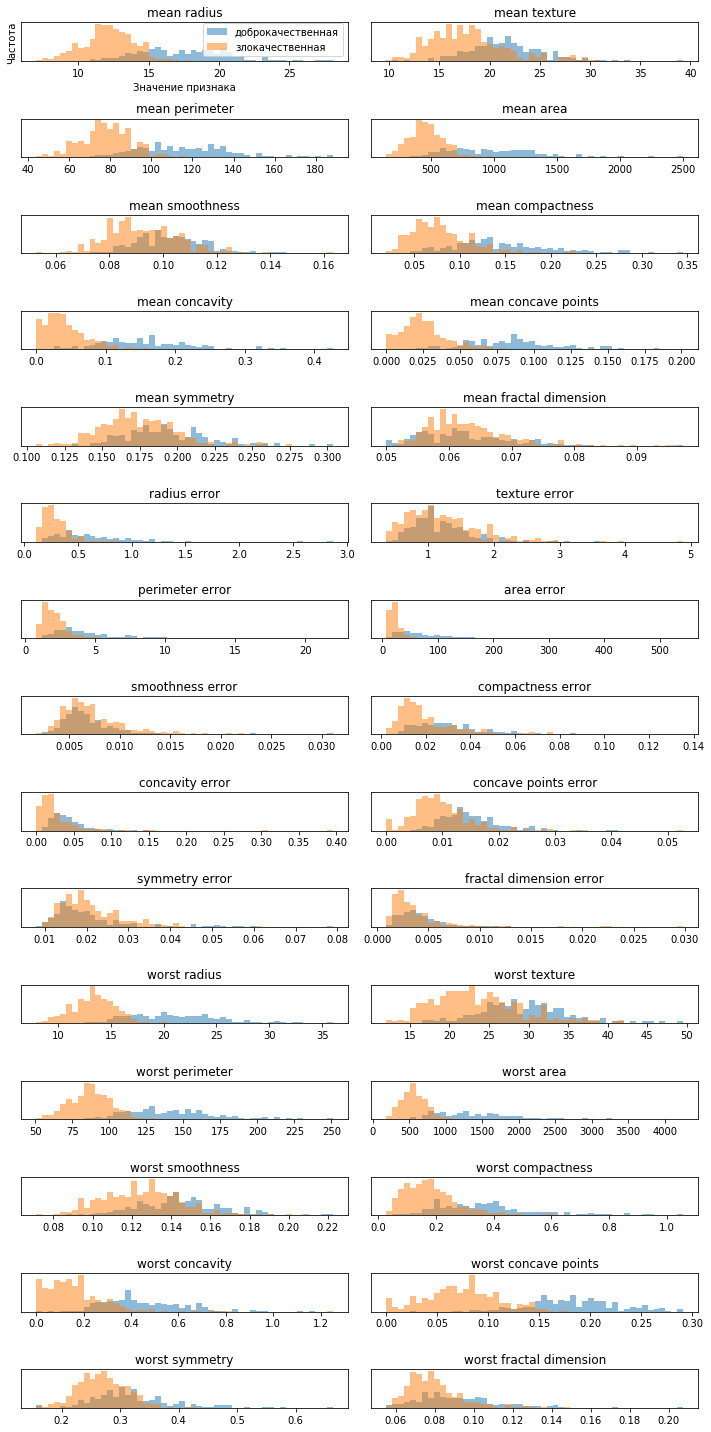

In [33]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins,  alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Значение признака")
ax[0].set_ylabel("Частота")
ax[0].legend(["доброкачественная", "злокачественная"], loc="best")
fig.tight_layout()

Отмасштабируем наши данные таким образом, чтобы каждый признак имел единичную дисперсию, воспользовавшись StandardScaler:

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [36]:
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [38]:
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

In [39]:
print("Форма исходного массива: {}".format(str(X_scaled.shape)))
print("Форма массива после сокращения размерности: {}".format(str(X_pca.shape)))

Форма исходного массива: (569, 30)
Форма массива после сокращения размерности: (569, 2)


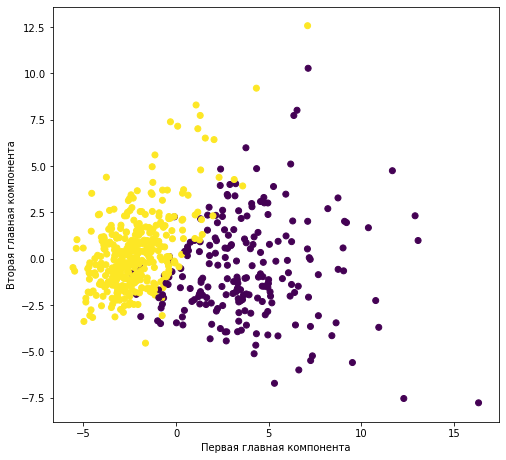

In [76]:
plt.figure(figsize=(8, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cancer.target)


plt.gca().set_aspect("equal")
plt.xlabel("Первая главная компонента")
plt.ylabel("Вторая главная компонента");

- Точки можно неплохо разделить даже простой прямой
- Желтые benign (доброкачественные)
- Фиолетовые malignant (злокачественные)
- Главные компоненты представляют собой комбинации исходных признаков


In [77]:
print("форма главных компонент: {}".format(pca.components_.shape))

форма главных компонент: (2, 30)


Каждая строка в атрибуте components_ соответствует одной главной компоненте и они отсортированы по важности (первой приводится первая главная компонента и т.д.). 

Столбцы соответствуют атрибуту исходных признаков для объекта PCA в этом примере, «mean radius», «mean texture» и т.д.

In [80]:
print("Первая компонента PCA:\n{}".format(pca.components_[0]))
print("Вторая компонента PCA:\n{}".format(pca.components_[1]))

Первая компонента PCA:
[0.21890244 0.10372458 0.22753729 0.22099499 0.14258969 0.23928535
 0.25840048 0.26085376 0.13816696 0.06436335 0.20597878 0.01742803
 0.21132592 0.20286964 0.01453145 0.17039345 0.15358979 0.1834174
 0.04249842 0.10256832 0.22799663 0.10446933 0.23663968 0.22487053
 0.12795256 0.21009588 0.22876753 0.25088597 0.12290456 0.13178394]
Вторая компонента PCA:
[-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
  0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
 -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
  0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
  0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]


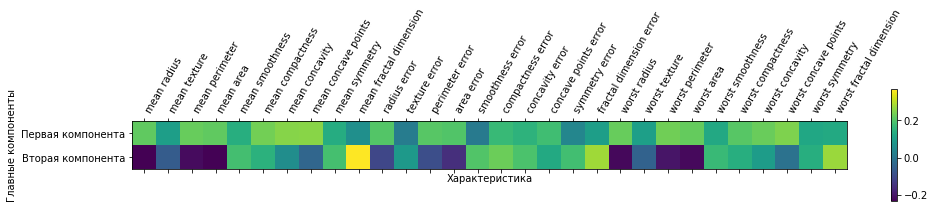

In [82]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["Первая компонента", "Вторая компонента"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Характеристика")
plt.ylabel("Главные компоненты");

## 2. t-SNE (t-distributed Stochastic Neighbor Embedding, Стохастическое вложение соседей с t-распределением)


Один из алгоритмов множественного обучения (manifold learning algorithms).

Идея, лежащая в основе алгоритма t-SNE, заключается в том, чтобы найти двумерное представление данных, **сохраняющее расстояния между точками** наилучшим образом. t-SNE начинает свою работу со случайного двумерного представления каждой точки данных, а затем пытается сблизить точки, которые в пространстве исходных признаков находятся близко друг к другу, и отдаляет друг от
друга точки, которые находятся далеко друг от друга. При этом t-SNE уделяет большее внимание сохранению расстояний между точками, близко расположенными друг к другу. Иными словами, он пытается сохранить информацию, указывающую на то, какие точки являются соседями друг другу.

In [8]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [5]:
digits = load_digits()

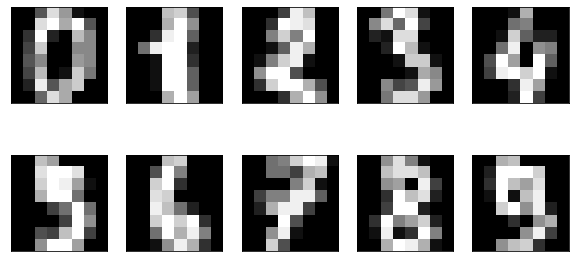

In [7]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                         subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img, cmap='gray')

Применим PCA

In [9]:
pca = PCA(n_components=2)
pca.fit(digits.data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [10]:
# преобразуем данные рукописных цифр к первым двум компонентам
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
"#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]

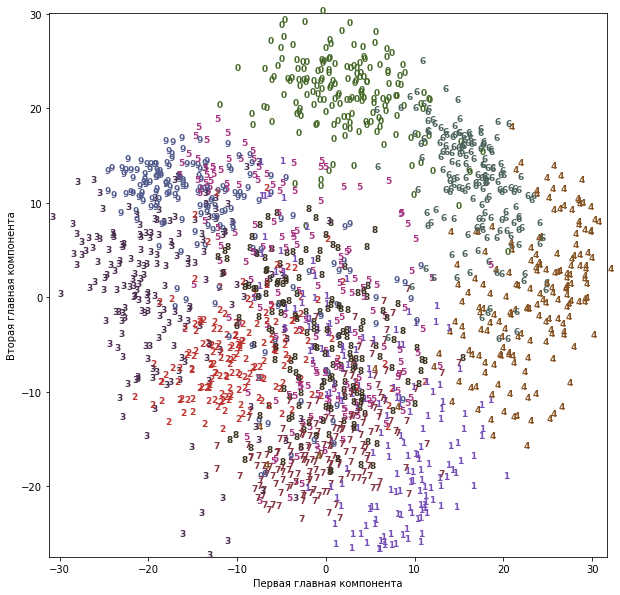

In [12]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    # строим график, где цифры представлены символами вместо точек
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("Первая главная компонента")
plt.ylabel("Вторая главная компонента");

Цифры неплохо разделены с помощью только первых двух компонент, но классы сильно перекрывают друг друга

Применим t-SNE

In [16]:
from sklearn.manifold import TSNE

In [17]:
tsne = TSNE(random_state=42, n_components=2)
digits_tsne = tsne.fit_transform(digits.data)

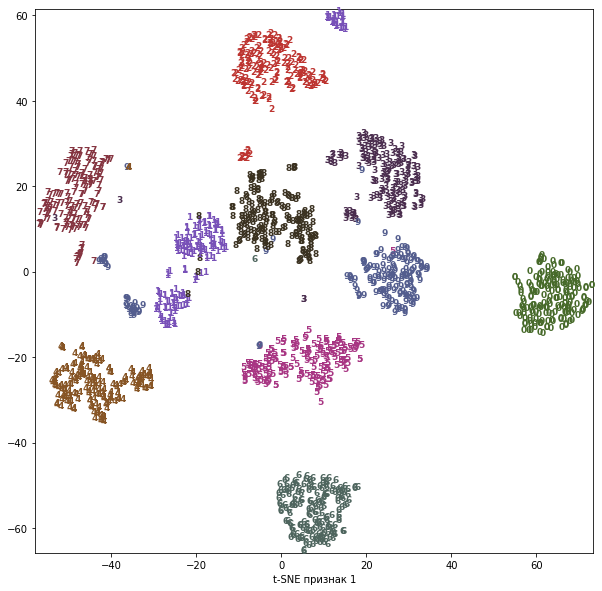

In [18]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    # строим график, где цифры представлены символами вместо точек
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE признак 0")
plt.xlabel("t-SNE признак 1");

Разделение более точное, но некоторые кластеры распадаются (9 и 1)

In [19]:
tsne = TSNE(random_state=42, n_components=3)
digits_3d = tsne.fit_transform(digits['data'])
from mpl_toolkits.mplot3d import Axes3D

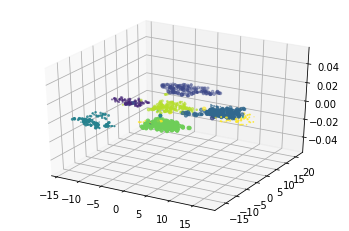

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.scatter(digits_3d[:, 0], digits_3d[:,1], digits_3d[:, 2], 
            c=digits['target']);

# Домашнее задание 3
### Алгоритм PCA

Дана матрица данных $D$ и коэффициент $\alpha$:
1. вычисляем среднее значение $\mu = \frac{1}{n} \sum \limits_{i=1}^{n} x_i$;
2. центруем матрицу данных $Z = D - 1 \cdot \mu^T$;
3. вычисляем матрицу ковариаций $K = \frac{1}{n} (Z^T Z)$;
4. вычисляем собственные значения $(\lambda_1, \lambda_2, \ldots, \lambda_d)$;
5. вычисляем собственные векторы $U = (u_1 u_2 \ldots u_d)$;
6. вычисляем долю общей дисперсии $f(r) = \frac{\sum_{i=1}^{r} \lambda_i} {\sum_{i=1}^{n} \lambda_i}$;
7. выбираем наименьший $r$ так, чтобы $f(r) \geq \alpha$;
8. выбираем $r$ первых векторов $U = (u_1 u_2 \ldots u_r)$;
9. уменьшаем признаковое пространство: $A = \{ a_i \: | \: a_i = U_r^T x_i, \: для \: i = 1, \ldots, n \} $

Реализуйте алгоритм для первых двух главных компонент. 

Найдите $\lambda_1$, $\lambda_2$ и $u_1$, $u_2$. 

Спроецируйте данные на плоскость образуемую этими векторами, визуализируйте полученные результаты c метками классов. 

Сравните реузльтаты с методом PCA из библиотеки sklearn.decomposition.

В качестве данных возьмите изображения с рукописными цифрами.

На основе полученных собственных значений ковариационной матриы $K$ постройте график зависимости покрываемой дисперсии трансформированных данных от количества главных компонент.

# Интерпретация компонент
## Корреляция с исходными признаками
Главные компоненты являются линейными кобинациями исходных признаков. В этой связи необходимо оценить связь каждой компоненты с исходными признаками.

Рассчет взаимосвязи будем проводить с помощью корреляции Пирсона:

\begin{equation}
r_{jk} = \frac{\sum_{i=1}^n (x_{ij} - \bar{x}_j) (x_{ik}' - \bar{x}_k')}{\sqrt{\sum_{i=1}^n (x_{ij} - \bar{x}_j)^2 \sum_{i=1}^n (x_{ik}' - \bar{x}_k')^2}}
\end{equation}

где
$\bar{x}_j$ - среднее значение $j$-го признака,
$\bar{x}_k'$ - среднее значение проекции на $k$-ю главную компоненту,
$n$ - количество объектов.

Отметим, что корреляция Пирсона изменяется от $-1$ до $+1$. Она равна $0$ в случае, когда величины независимы, и $\pm 1$, если они линейно зависимы.

Определите по коэффициентам корреляции, какие признаки в какую компоненту вошли.